In [1]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_json('E:\\Ly project mad\\amazon\\today\\tops_fashion.json')
print ('Number of data points : ', data.shape[0], \
       'Number of features/variables:', data.shape[1])
data.columns

Number of data points :  183138 Number of features/variables: 19


Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

In [3]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]
print ('Number of data points : ', data.shape[0], \
       'Number of features:', data.shape[1])
data.head(n=20)

Number of data points :  183138 Number of features: 7


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
5,B00TAEHGGS,Fitscloth,Grape,https://images-na.ssl-images-amazon.com/images...,SHIRT,[Fits Cloth] Grape Solid Modern Long Sleeve Pl...,None
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
7,B074GPTP3J,Floerns,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Floerns Women's Bell Sleeve Beading Casual Blo...,None
8,B06Y2LCC5S,Fashion2ne1,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,Standing on His Promises Rhinestones T-Shirt R...,None
9,B00T9W4E66,Fila,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Fila Women's Tulip Durable Tennis Style Comfor...,None


In [4]:
print(data['product_type_name'].describe())
print(data['product_type_name'].unique())
product_type_count = Counter(list(data['product_type_name']))
product_type_count.most_common(10)

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object
['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAF

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [5]:
#reove duplicated title 
data = pd.read_pickle('E:\\Ly project mad\\amazon\\today\\pickels-20200703T062402Z-001\\pickels\\28k_apparel_data')
print(sum(data.duplicated('title')))
data = pd.read_pickle('E:\\Ly project mad\\amazon\\today\\pickels-20200703T062402Z-001\\pickels\\28k_apparel_data')
data.head()

2326


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
11,B001LOUGE4,Fitness Etc.,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,Ladies Cotton Tank 2x1 Ribbed Tank Top,$11.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
21,B014ICEDNA,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel Short...,$7.50


In [6]:
# Remove All products with very few words in title
data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short description:", data_sorted.shape[0])
data_sorted.sort_values('title',inplace=True, ascending=False)
data_sorted.head()


After removal of products with short description: 27958


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
61973,B06Y1KZ2WB,Éclair,Black/Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Éclair Women's Printed Thin Strap Blouse Black...,$24.99
133820,B010RV33VE,xiaoming,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
81461,B01DDSDLNS,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Women's White Long Sleeve Single Brea...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
151570,B00WPJG35K,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32


In [7]:
indices = []
for i,row in data_sorted.iterrows():
    
    indices.append(i)
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:#2 for loop
    
    previous_i = i

    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()

    # search for the similar products sequentially 
    j = i+1
    while j < num_data_points:

        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()

        # store the maximum length of two strings
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1

        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) > 2: # number of words in which both sensences differ
            # if both strings are differ by more than 2 words we include the 1st string index
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])


            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]
print('Number of data points : ', data.shape[0])


Number of data points :  17596


In [8]:
#data preprocessing
data = pd.read_pickle('E:\\Ly project mad\\amazon\\today\\pickels-20200703T062402Z-001\\pickels\\17k_apparel_data')
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum())) 
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string
        
start_time = time.clock()
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")
data.head()


list of stop words: {'didn', 'about', 'have', "shan't", 'the', 'been', 'be', 'out', 'nor', 'being', "doesn't", 'here', 'of', 's', 'm', 'all', 'had', 'ours', 'once', 'through', 'where', 'so', 'itself', 'yourself', 'by', 'shan', 'against', "should've", 'when', "don't", 'those', 'below', 'themselves', 'should', 'now', 'can', 'too', "wasn't", 'very', 'needn', 'theirs', "that'll", 'mustn', "you've", 'same', 'them', 'an', 'between', 'who', "haven't", 'him', 'it', 'off', 'wouldn', 'at', "needn't", 'am', 'into', 'hers', "mightn't", 't', 'herself', 'before', 'down', 'she', 'but', 'to', 'how', 'or', 're', "aren't", "won't", 'having', 'under', 'if', 'her', 'more', 'further', "couldn't", 'doesn', "hadn't", 'isn', 'these', 'weren', 'this', 'that', 'does', 'above', 'which', 'their', 'over', 'y', 'then', 'couldn', "you'll", 'd', 've', 'while', 'my', 'himself', 'few', 'me', 'was', 'shouldn', 'are', "she's", 'don', "didn't", 'we', 'myself', 'has', "mustn't", 'you', 'again', "wouldn't", 'not', 'only', '

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
11,B001LOUGE4,Fitness Etc.,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,ladies cotton tank 2x1 ribbed tank top,$11.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39


In [9]:
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()
print(stemmer.stem('arguing'))
print(stemmer.stem('fishing'))


# We tried using stemming on our titles and it didnot work very well. 


argu
fish


In [10]:
data = pd.read_pickle('E:\\Ly project mad\\amazon\\today\\pickels-20200703T062402Z-001\\pickels\\16k_apperal_data_preprocessed')
data.head()



   
def display_img(url,ax,fig):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
  
#plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, url, text):  #https://seaborn.pydata.org/generated/seaborn.heatmap.html 
       
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(20,3))
        
        
        ax = plt.subplot(gs[0]) #its vertical line
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) 
        ax.set_title(text) 
        
       
        ax = plt.subplot(gs[1])
       
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        display_img(url, ax, fig)
        
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

   
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    keys = list(vec2.keys())
    values = [vec2[x] for x in vec2.keys()]
    
    

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    

    plot_heatmap(keys, values, labels, url, text)



def text_to_vector(text):
    word = re.compile(r'\w+') #This matches alphanumeric character [a-zA-Z0-9_]
    print(word)
    words = word.findall(text) #its return contain a and b words list33
    
    return Counter(words) #Python Counter is a container that will hold the count of each of the elements present in the container. The counter is a sub-class available inside the dictionary class.



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    vector1 = text_to_vector(text1)

    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape()

(16042, 12609)

re.compile('\\w+')
re.compile('\\w+')


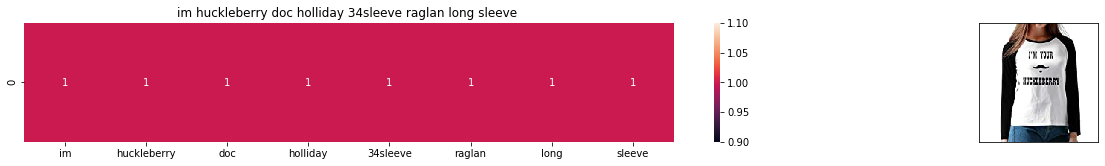

ASIN : B01MG2JKHS
Brand: PERI
Title: im huckleberry doc holliday 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 0.0
re.compile('\\w+')
re.compile('\\w+')


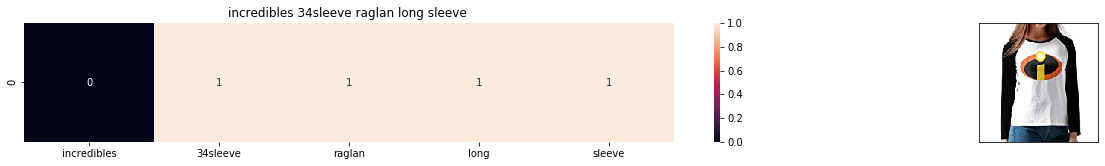

ASIN : B01MG2BBQ0
Brand: PERI
Title: incredibles 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.23606797749979
re.compile('\\w+')
re.compile('\\w+')


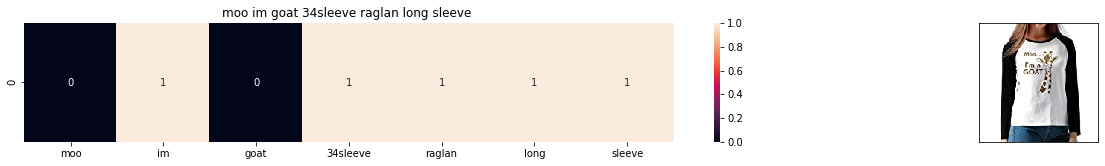

ASIN : B01MQ035YO
Brand: PERI
Title: moo im goat 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.23606797749979
re.compile('\\w+')
re.compile('\\w+')


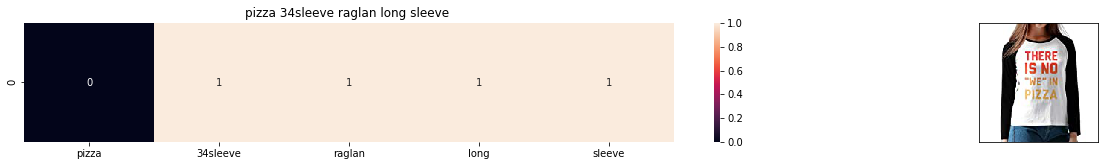

ASIN : B01MPZYO3E
Brand: PERI
Title: pizza 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.23606797749979
re.compile('\\w+')
re.compile('\\w+')


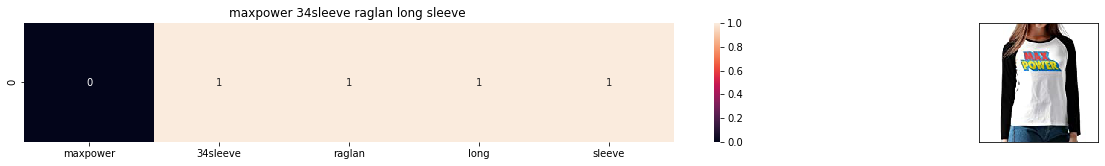

ASIN : B01MG2QTAO
Brand: PERI
Title: maxpower 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.23606797749979
re.compile('\\w+')
re.compile('\\w+')


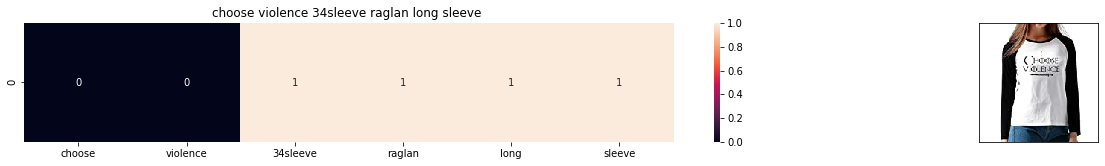

ASIN : B01MPZYO33
Brand: PERI
Title: choose violence 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.449489742783178
re.compile('\\w+')
re.compile('\\w+')


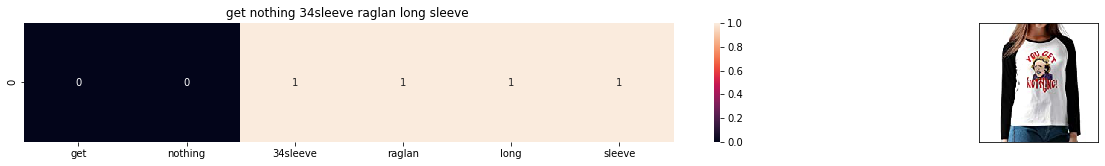

ASIN : B01MG2O151
Brand: PERI
Title: get nothing 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.449489742783178
re.compile('\\w+')
re.compile('\\w+')


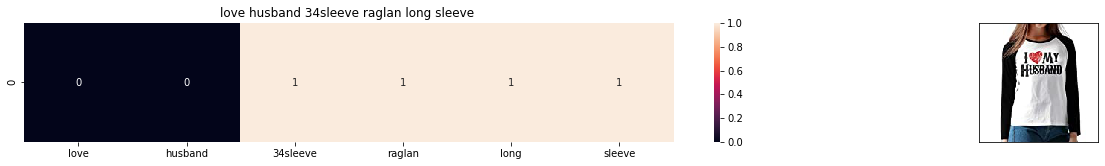

ASIN : B01M30HH5A
Brand: PERI
Title: love husband 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.449489742783178
re.compile('\\w+')
re.compile('\\w+')


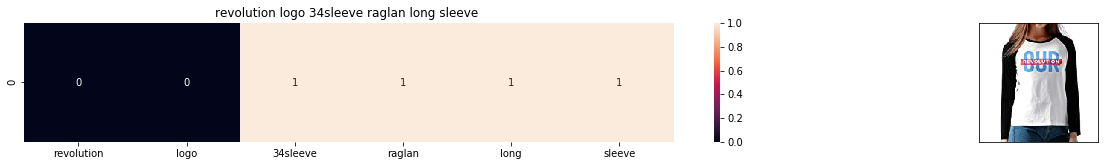

ASIN : B01MG26684
Brand: PERI
Title: revolution logo 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.449489742783178
re.compile('\\w+')
re.compile('\\w+')


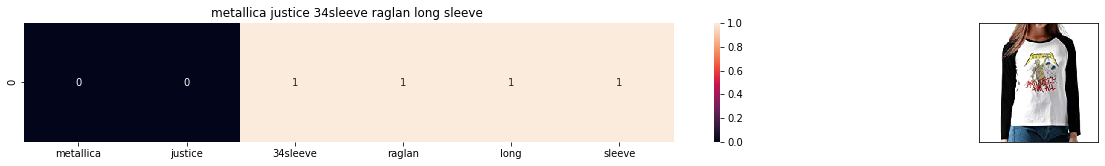

ASIN : B01MG0VNLW
Brand: PERI
Title: metallica justice 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.449489742783178
re.compile('\\w+')
re.compile('\\w+')


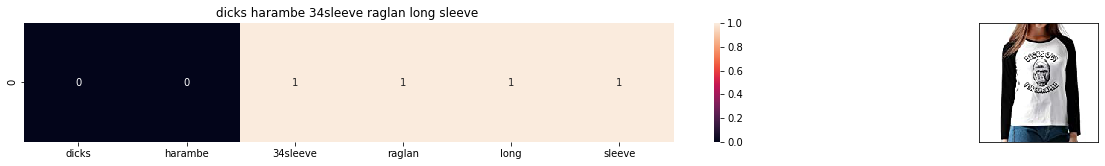

ASIN : B01MG2H3MM
Brand: PERI
Title: dicks harambe 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.449489742783178
re.compile('\\w+')
re.compile('\\w+')


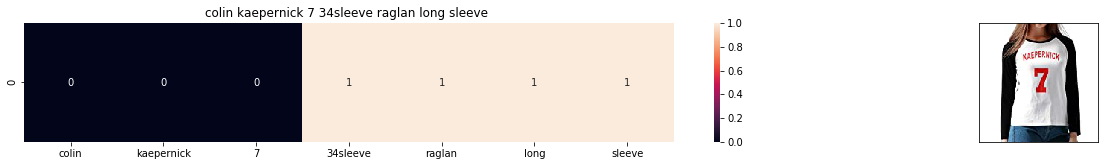

ASIN : B01M30HGKI
Brand: PERI
Title: colin kaepernick 7 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.449489742783178
re.compile('\\w+')
re.compile('\\w+')


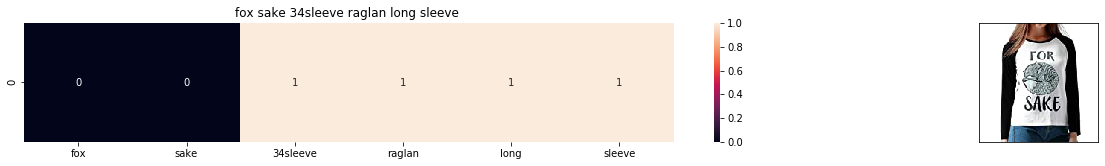

ASIN : B01MF9YF1H
Brand: PERI
Title: fox sake 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.449489742783178
re.compile('\\w+')
re.compile('\\w+')


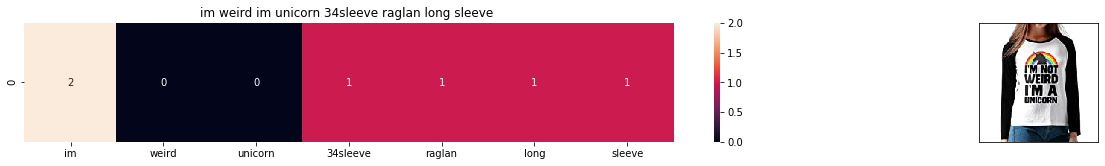

ASIN : B01M3SRJES
Brand: PERI
Title: im weird im unicorn 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.449489742783178
re.compile('\\w+')
re.compile('\\w+')


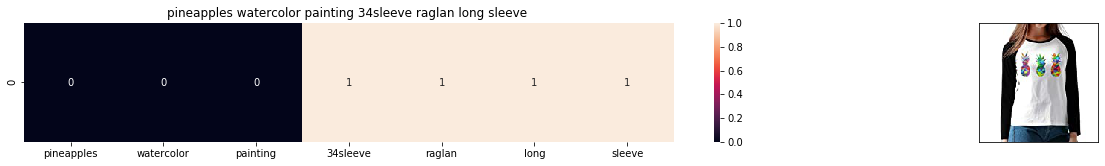

ASIN : B01MG2Q1R3
Brand: PERI
Title: pineapples watercolor painting 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.6457513110645907
re.compile('\\w+')
re.compile('\\w+')


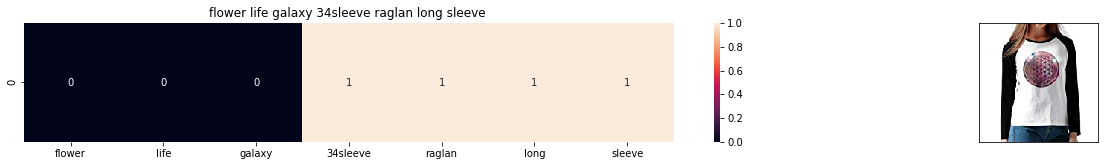

ASIN : B01MG2NPNS
Brand: PERI
Title: flower life galaxy 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.6457513110645907
re.compile('\\w+')
re.compile('\\w+')


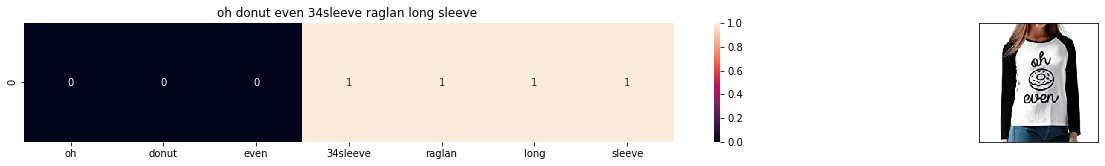

ASIN : B01MCXE9Y2
Brand: PERI
Title: oh donut even 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.6457513110645907
re.compile('\\w+')
re.compile('\\w+')


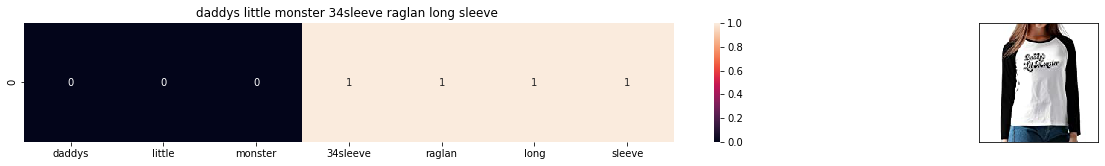

ASIN : B01M4MWVNV
Brand: PERI
Title: daddys little monster 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.6457513110645907
re.compile('\\w+')
re.compile('\\w+')


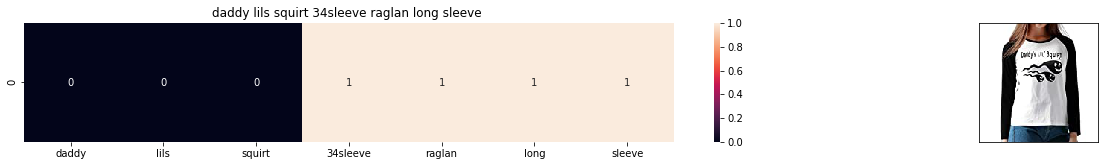

ASIN : B01MG2SGVM
Brand: PERI
Title: daddy lils squirt 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.6457513110645907
re.compile('\\w+')
re.compile('\\w+')


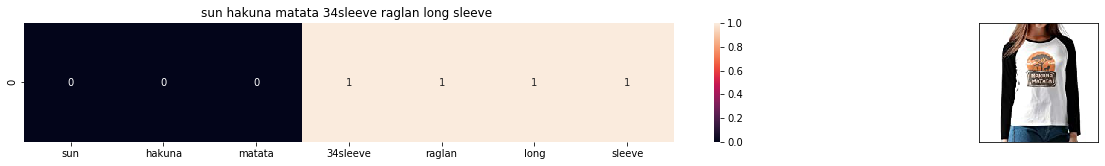

ASIN : B01MG2QRFK
Brand: PERI
Title: sun hakuna matata 34sleeve raglan long sleeve 
Euclidean similarity with the query image : 2.6457513110645907


In [15]:
def bag_of_words_model(doc_id, num_results):  #id=input query    num result=hoe many result you want
    
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]  #it make list of index(sorted value index)   fatten=matrix to row converter
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]      #it make list of value(sorted)
    #print(indices)
    #print(pdists)
    df_indices = list(data.index[indices])
    #print(df_indices)
    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

bag_of_words_model(12562, 20) 

re.compile('\\w+')
re.compile('\\w+')


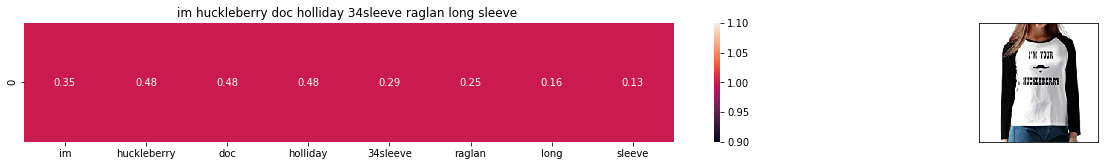

ASIN : B01MG2JKHS
BRAND : PERI
Eucliden distance from the given image : 0.0
re.compile('\\w+')
re.compile('\\w+')


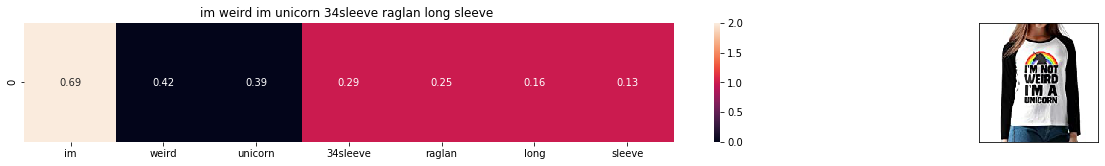

ASIN : B01M3SRJES
BRAND : PERI
Eucliden distance from the given image : 1.0649487461630647
re.compile('\\w+')
re.compile('\\w+')


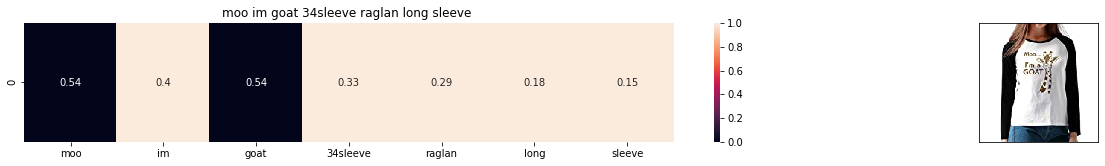

ASIN : B01MQ035YO
BRAND : PERI
Eucliden distance from the given image : 1.1335754403057734
re.compile('\\w+')
re.compile('\\w+')


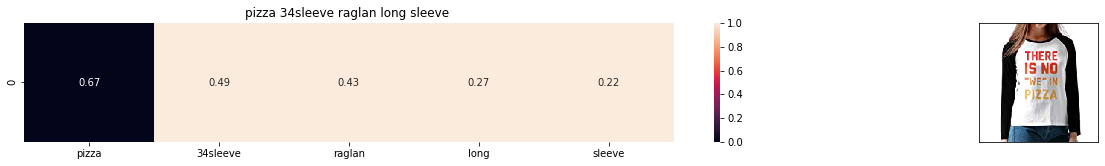

ASIN : B01MPZYO3E
BRAND : PERI
Eucliden distance from the given image : 1.1627003249587695
re.compile('\\w+')
re.compile('\\w+')


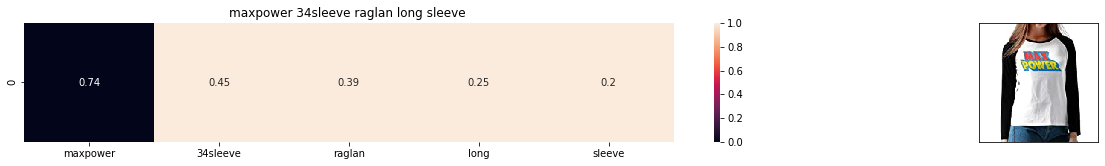

ASIN : B01MG2QTAO
BRAND : PERI
Eucliden distance from the given image : 1.1872291620915079
re.compile('\\w+')
re.compile('\\w+')


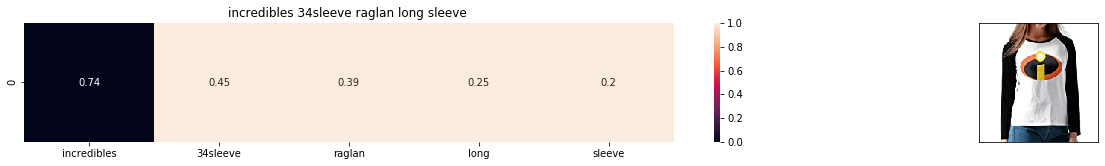

ASIN : B01MG2BBQ0
BRAND : PERI
Eucliden distance from the given image : 1.1872291620915079
re.compile('\\w+')
re.compile('\\w+')


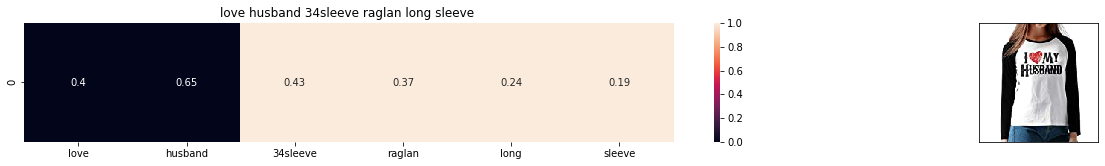

ASIN : B01M30HH5A
BRAND : PERI
Eucliden distance from the given image : 1.1960847619438466
re.compile('\\w+')
re.compile('\\w+')


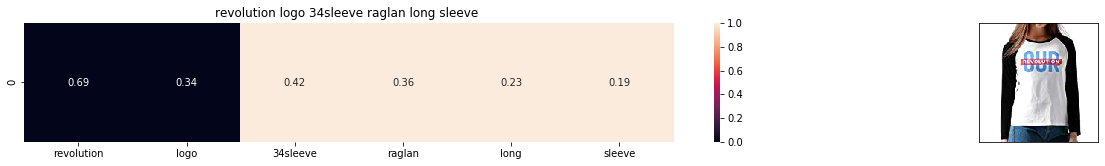

ASIN : B01MG26684
BRAND : PERI
Eucliden distance from the given image : 1.202379257381165
re.compile('\\w+')
re.compile('\\w+')


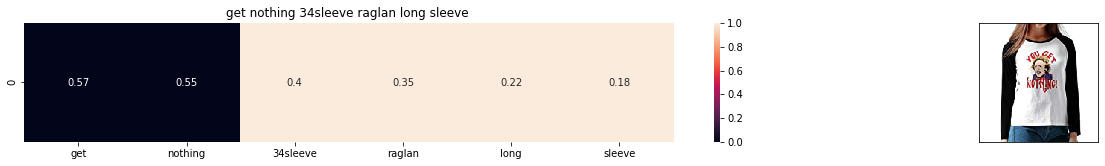

ASIN : B01MG2O151
BRAND : PERI
Eucliden distance from the given image : 1.2117794081962616
re.compile('\\w+')
re.compile('\\w+')


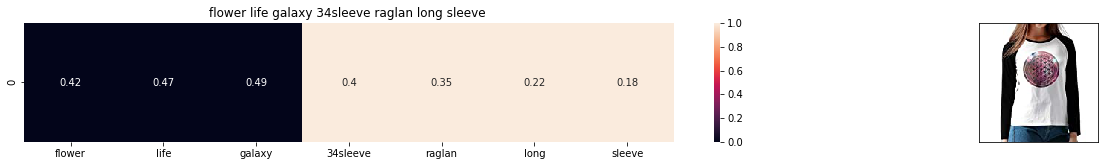

ASIN : B01MG2NPNS
BRAND : PERI
Eucliden distance from the given image : 1.21205545761381
re.compile('\\w+')
re.compile('\\w+')


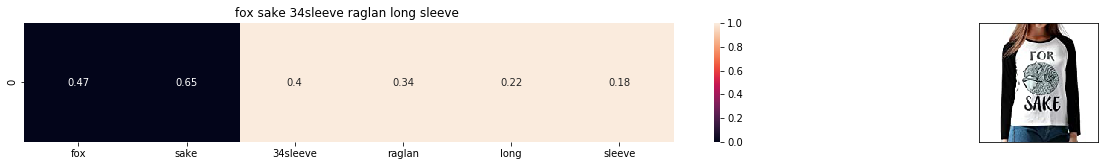

ASIN : B01MF9YF1H
BRAND : PERI
Eucliden distance from the given image : 1.2165356360049693
re.compile('\\w+')
re.compile('\\w+')


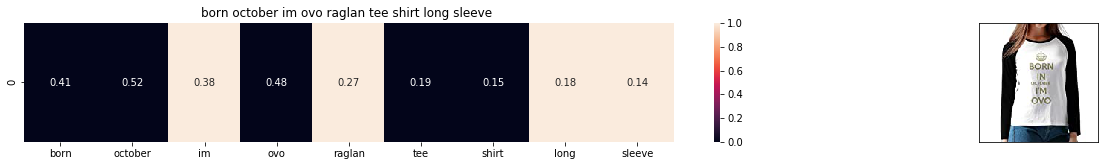

ASIN : B01MG29HY8
BRAND : PERI
Eucliden distance from the given image : 1.2250655838192506
re.compile('\\w+')
re.compile('\\w+')


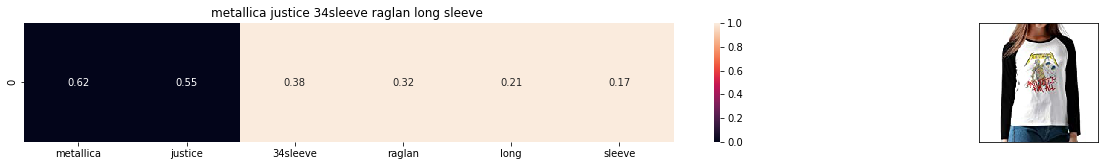

ASIN : B01MG0VNLW
BRAND : PERI
Eucliden distance from the given image : 1.2273672358647922
re.compile('\\w+')
re.compile('\\w+')


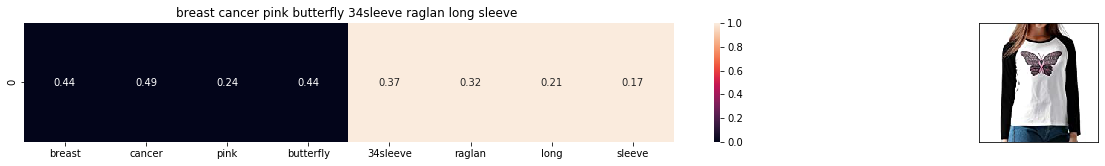

ASIN : B01MAZ2RWH
BRAND : PERI
Eucliden distance from the given image : 1.228971125312849
re.compile('\\w+')
re.compile('\\w+')


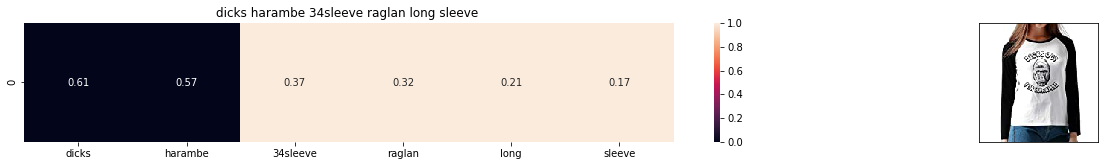

ASIN : B01MG2H3MM
BRAND : PERI
Eucliden distance from the given image : 1.230131813891745
re.compile('\\w+')
re.compile('\\w+')


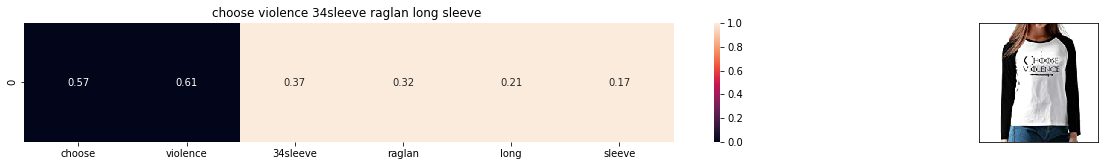

ASIN : B01MPZYO33
BRAND : PERI
Eucliden distance from the given image : 1.230131813891745
re.compile('\\w+')
re.compile('\\w+')


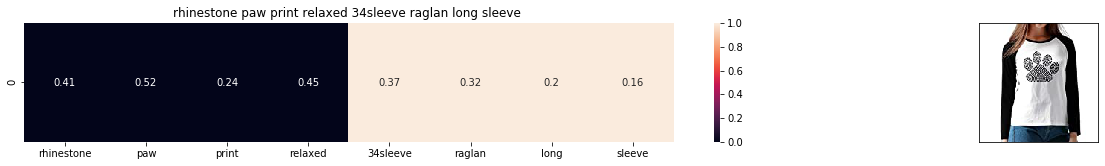

ASIN : B01MG2AWEM
BRAND : PERI
Eucliden distance from the given image : 1.2318007867216454
re.compile('\\w+')
re.compile('\\w+')


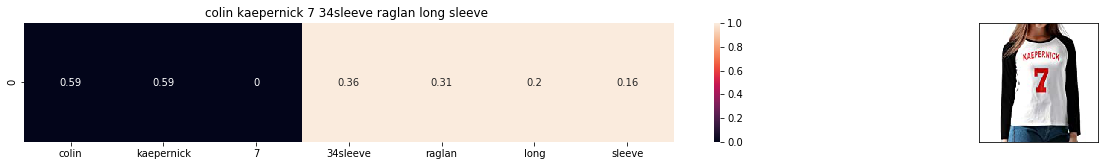

ASIN : B01M30HGKI
BRAND : PERI
Eucliden distance from the given image : 1.2348507560300515
re.compile('\\w+')
re.compile('\\w+')


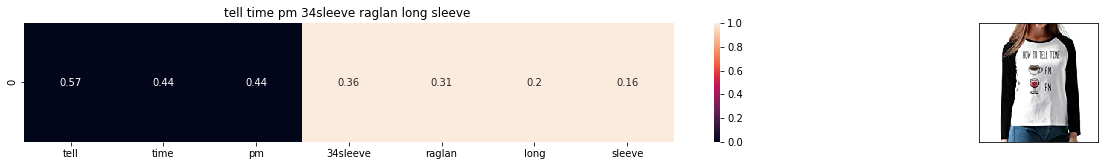

ASIN : B01MFBI9GM
BRAND : PERI
Eucliden distance from the given image : 1.2362958228073209
re.compile('\\w+')
re.compile('\\w+')


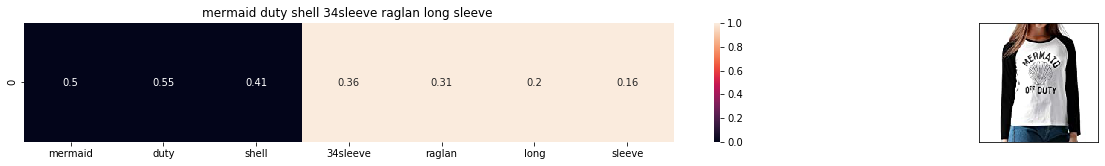

ASIN : B01M67A0GK
BRAND : PERI
Eucliden distance from the given image : 1.2371034918480732


In [13]:
#tf-idf 
tfidf_title_vectorizer = TfidfVectorizer()      
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
def tfidf_model(doc_id, num_results):
    
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
tfidf_model(12562, 20)